In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. 데이터 불러오기

In [11]:
htd_gagu = pd.read_csv('../2010/seoulM_gagu.csv')
htd_gagu.head() # 226,563

,sheet_code,sheet_type,home_memno,home_childno,car_yesno,car1,car2,car3,car4,car5,car6,car7,car_etc,home_type,home_jumyou,home_income,subway_time,busstop_time
0,10010530202,1,1,0,2,0,0,0,0,0,1,0,0,4,1,1,15,7
1,10010530203,1,4,0,1,0,0,0,0,0,0,0,0,4,2,1,10,6
2,10010530204,1,4,0,2,1,0,0,0,0,0,0,0,4,2,2,10,5
3,10010530205,1,3,0,1,0,0,0,0,0,0,0,0,4,1,4,15,10
4,10010530206,1,3,0,1,0,0,0,0,0,0,0,0,4,2,1,15,10


In [12]:
htd_ind = pd.read_csv('../2010/seoulM_ind.csv')
htd_ind.head() # 661,779

,sheet_code,sheet_type,seq,relation,birth_year,sex,drive_license,job_type,employee_type,ju5_il,th_yesno,th_nosayou,dongger
0,10010530202,1,1,1,1949,2,2,8,3,3,1,,1
1,10010530203,1,1,1,1959,2,2,4,2,2,1,,1
2,10010530203,1,2,3,1985,2,2,3,2,1,1,,1
3,10010530203,1,3,3,1990,2,2,1,,,1,,1
4,10010530203,1,4,3,1992,1,2,1,,,1,,1


In [13]:
htd_travel = pd.read_csv('../2010/seoulM_travel.csv')
htd_travel.head() # 1,390,178

,sheet_code,sheet_type,seq,tr_seq,tr_mokjek,tr_sudan,start_type,start_zcode,start_time,end_type,end_zcode,end_time,person,highway
0,10010530202,1,1,1,3,4,1,01-001-053,600,2,01-001-060,630,0,2
1,10010530202,1,1,2,2,4,2,01-001-060,1800,1,01-001-053,1830,0,2
2,10010530203,1,1,1,3,4,1,01-001-053,610,2,01-013-075,630,0,2
3,10010530203,1,1,2,2,4,2,01-013-075,1710,1,01-001-053,1840,0,2
4,10010530203,1,1,3,10,1,1,01-001-053,1930,5,01-001-053,1940,0,2


### ※ data 정의
 - 1) htd_gagu   : 가구 전체
 - 2) htd_ind    : 개인
 - 3) htd_travel : 개인의 통행 

In [14]:
htd_gagu.head()
htd_ind.head()
htd_travel.head()

,sheet_code,sheet_type,home_memno,home_childno,car_yesno,car1,car2,car3,car4,car5,car6,car7,car_etc,home_type,home_jumyou,home_income,subway_time,busstop_time
0,10010530202,1,1,0,2,0,0,0,0,0,1,0,0,4,1,1,15,7
1,10010530203,1,4,0,1,0,0,0,0,0,0,0,0,4,2,1,10,6
2,10010530204,1,4,0,2,1,0,0,0,0,0,0,0,4,2,2,10,5
3,10010530205,1,3,0,1,0,0,0,0,0,0,0,0,4,1,4,15,10
4,10010530206,1,3,0,1,0,0,0,0,0,0,0,0,4,2,1,15,10


,sheet_code,sheet_type,seq,relation,birth_year,sex,drive_license,job_type,employee_type,ju5_il,th_yesno,th_nosayou,dongger
0,10010530202,1,1,1,1949,2,2,8,3,3,1,,1
1,10010530203,1,1,1,1959,2,2,4,2,2,1,,1
2,10010530203,1,2,3,1985,2,2,3,2,1,1,,1
3,10010530203,1,3,3,1990,2,2,1,,,1,,1
4,10010530203,1,4,3,1992,1,2,1,,,1,,1


,sheet_code,sheet_type,seq,tr_seq,tr_mokjek,tr_sudan,start_type,start_zcode,start_time,end_type,end_zcode,end_time,person,highway
0,10010530202,1,1,1,3,4,1,01-001-053,600,2,01-001-060,630,0,2
1,10010530202,1,1,2,2,4,2,01-001-060,1800,1,01-001-053,1830,0,2
2,10010530203,1,1,1,3,4,1,01-001-053,610,2,01-013-075,630,0,2
3,10010530203,1,1,2,2,4,2,01-013-075,1710,1,01-001-053,1840,0,2
4,10010530203,1,1,3,10,1,1,01-001-053,1930,5,01-001-053,1940,0,2


# 2. 데이터 전처리
## 1) 데이터 병합

In [15]:
# sheet code의 데이터 타입 : int32 
print(htd_gagu.sheet_code.dtypes, htd_ind.sheet_code.dtypes, htd_travel.sheet_code.dtypes)

int64 int64 int64


In [16]:
# sheet_code 앞에 '0'을 붙이기 위해 sheet_code를 문자형으로 변환(ex :'01'이 서울을 나타냄)
htd_gagu['sheet_code'] = htd_gagu.sheet_code.astype('str')
htd_ind['sheet_code'] = htd_ind.sheet_code.astype('str')
htd_travel['sheet_code'] = htd_travel.sheet_code.astype('str')

In [17]:
# 문자형으로 바뀌었는지 확인하기 위해 데이터 타입 확인
print(htd_gagu.sheet_code.dtypes, htd_ind.sheet_code.dtypes, htd_travel.sheet_code.dtypes)

object object object


In [18]:
# sheet_code 앞에 '0' 붙이기
htd_gagu['sheet_code'] = '0' + htd_gagu['sheet_code']
htd_ind['sheet_code'] = '0' + htd_ind['sheet_code']
htd_travel['sheet_code'] = '0' + htd_travel['sheet_code']

In [19]:
# 개인 데이터와 가구 데이터 병합
htd_ig = pd.merge(htd_ind, htd_gagu,
                  on = 'sheet_code',
                  how = 'left')
htd_ig.head()

,sheet_code,sheet_type_x,seq,relation,birth_year,sex,drive_license,job_type,employee_type,ju5_il,...,car4,car5,car6,car7,car_etc,home_type,home_jumyou,home_income,subway_time,busstop_time
0,010010530202,1,1,1,1949,2,2,8,3,3,...,0,0,1,0,0,4,1,1,15,7
1,010010530203,1,1,1,1959,2,2,4,2,2,...,0,0,0,0,0,4,2,1,10,6
2,010010530203,1,2,3,1985,2,2,3,2,1,...,0,0,0,0,0,4,2,1,10,6
3,010010530203,1,3,3,1990,2,2,1,,,...,0,0,0,0,0,4,2,1,10,6
4,010010530203,1,4,3,1992,1,2,1,,,...,0,0,0,0,0,4,2,1,10,6


In [20]:
# 개인, 가구 데이터와 통행 데이터를 병합하기 위해 새로운 조인 키 생성
htd_ig['seq'] = htd_ig.seq.astype('str')
htd_travel['seq'] = htd_travel.seq.astype('str')

htd_ig['Nsheet_code'] = htd_ig['sheet_code'] + '_' + htd_ig['seq']
htd_travel['Nsheet_code'] = htd_travel['sheet_code'] + '_' + htd_travel['seq']

htd_ig['Nsheet_code'].head()
htd_travel['Nsheet_code'].head()

0    010010530202_1
1    010010530203_1
2    010010530203_2
3    010010530203_3
4    010010530203_4
Name: Nsheet_code, dtype: object

0    010010530202_1
1    010010530202_1
2    010010530203_1
3    010010530203_1
4    010010530203_1
Name: Nsheet_code, dtype: object

In [21]:
# 개인, 가구 데이터와 통행 데이터를 병합
htd = pd.merge(htd_travel, htd_ig, on = 'Nsheet_code', how = 'left')
len(htd.columns)

45

In [22]:
# Feature selection
## 분석을 위해 필요하다고 판단되는 열만 선택
htd = htd[['Nsheet_code', 'busstop_time', 'subway_time', 'home_memno', 'home_type', 
           'home_jumyou', 'home_income', 'car_yesno', 'birth_year', 'sex', 'drive_license', 
           'job_type', 'th_yesno', 'start_type', 'start_zcode', 'start_time', 'tr_mokjek', 
           'end_type', 'end_zcode', 'tr_sudan', 'end_time']]
htd.head()

,Nsheet_code,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,...,job_type,th_yesno,start_type,start_zcode,start_time,tr_mokjek,end_type,end_zcode,tr_sudan,end_time
0,010010530202_1,7,15,1,4,1,1,2,1949,2,...,8,1,1,01-001-053,600,3,2,01-001-060,4,630
1,010010530202_1,7,15,1,4,1,1,2,1949,2,...,8,1,2,01-001-060,1800,2,1,01-001-053,4,1830
2,010010530203_1,6,10,4,4,2,1,1,1959,2,...,4,1,1,01-001-053,610,3,2,01-013-075,4,630
3,010010530203_1,6,10,4,4,2,1,1,1959,2,...,4,1,2,01-013-075,1710,2,1,01-001-053,4,1840
4,010010530203_1,6,10,4,4,2,1,1,1959,2,...,4,1,1,01-001-053,1930,10,5,01-001-053,1,1940


## 2) 서울에서 발생한 통행만 추출

In [23]:
htd['start_si'] = htd.start_zcode.str.slice(stop = 2)# 출발동 코드 : 서울
htd['end_si'] = htd.end_zcode.str.slice(stop = 2) # 도착동 코드 : 서울

# 서울 to 서울
len(htd[(htd["start_si"] == '01') & ( htd["end_si"] == '01')])
htd_seoul = htd[(htd.start_si == '01') & (htd.end_si == '01')] # 566,296
htd_seoul = htd_seoul.drop(['start_si', 'end_si'], 1) # drop the start_si and end_si

566296

## 3) 통행 소요시간

In [24]:
htd_time = htd_seoul

htd_time['start_time'] = htd_time.start_time.astype('str') # hhmm
htd_time['end_time'] = htd_time.end_time.astype('str')

htd_time.loc[htd_time.start_time.str.len() == 3, 'start_time'] = '0' + htd_time.loc[htd_seoul.start_time.str.len() == 3, 'start_time']
htd_time.loc[htd_time.start_time.str.len() == 2, 'start_time'] = '00' + htd_time.loc[htd_seoul.start_time.str.len() == 2, 'start_time']
htd_time.loc[htd_time.start_time.str.len() == 1, 'start_time'] = '000' + htd_time.loc[htd_seoul.start_time.str.len() == 1, 'start_time']
htd_time.loc[htd_time.end_time.str.len() == 3, 'end_time'] = '0' + htd_time.loc[htd_seoul.end_time.str.len() == 3, 'end_time']
htd_time.loc[htd_time.end_time.str.len() == 2, 'end_time'] = '00' + htd_time.loc[htd_seoul.end_time.str.len() == 2, 'end_time']
htd_time.loc[htd_time.end_time.str.len() == 1, 'end_time'] = '000' + htd_time.loc[htd_seoul.end_time.str.len() == 1, 'end_time']

In [25]:
# start time
htd_time['start_hour'] = htd_time.start_time.str.slice(stop = 2).astype('int64')
htd_time['start_min'] = htd_time.start_time.str.slice(start = 2, stop = 4).astype('int64')

# end time
htd_time['end_hour'] = htd_time.end_time.str.slice(stop = 2).astype('int64')
htd_time['end_min'] = htd_time.end_time.str.slice(start = 2, stop = 4).astype('int64')

In [26]:
# calculate spent time
htd_time['startTime'] = htd_time.start_hour * 60 + htd_time.start_min
htd_time['endTime'] = htd_time.end_hour * 60 + htd_time.end_min

htd_time['spent_time'] = htd_time.endTime - htd_time.startTime
htd_time['spent_time'].head()
htd_time = htd_time.drop(['start_time', 'end_time', 'start_hour', 'start_min', 'end_hour', 'end_min',
                         'startTime', 'endTime'], 1)

0    30
1    30
2    20
3    90
4    10
Name: spent_time, dtype: int64

## 4) 통행 거리

In [27]:
# 존 코드에 행정도 코드 조인
## region code import
region_code = pd.read_csv("../region_code.csv")
region_code.head(2)

## make fid code()
region_code['rcode'] = region_code.rcode.astype('str')
region_code = region_code[['zcode', 'rcode']] # select only zcode & rcode

region_code['fid_code'] = pd.Series(np.arange(424), dtype = 'i8')
region_code.head(2)
region_code.tail(2)

# import distance matrix
distance_mat = pd.read_csv("../distance_mat.csv")
distance_mat.head()

,sido,sigungu,dong,zcode,address,rcode
0,서울특별시,종로구,사직동,01-001-053,서울특별시 종로구 사직동,1101053
1,서울특별시,종로구,삼청동,01-001-054,서울특별시 종로구 삼청동,1101054


,zcode,rcode,fid_code
0,01-001-053,1101053,0
1,01-001-054,1101054,1


,zcode,rcode,fid_code
422,01-025-073,1125073,422
423,01-025-074,1125074,423


,0,1,2,3,4,5,6,7,8,9,...,414,415,416,417,418,419,420,421,422,423
0,0.000000,1813.209057,2593.439101,4429.463855,1068.362303,620.814234,1748.215472,1750.440527,3038.891540,2969.026225,...,15206.380961,14926.109616,14634.741714,14611.991222,15335.200575,16087.173947,16369.184967,14746.854789,13840.550114,16000.875508
1,1813.209057,0.000000,1909.072935,3086.635729,2272.629883,2395.035125,748.438912,1608.507073,2644.905134,2140.699812,...,14652.481267,14470.905641,14347.259623,14244.682048,15017.436310,15804.216768,15965.436196,14133.527492,13356.419222,15505.919763
2,2593.439101,1909.072935,0.000000,2008.101541,2139.344963,2856.771519,2629.079533,3394.495747,4543.219903,4045.484826,...,16519.966977,16357.403900,16252.519284,16143.165164,16920.074274,17709.065011,17857.889347,15987.911537,15239.786116,17384.107630
3,4429.463855,3086.635729,2008.101541,0.000000,4137.329563,4794.327669,3796.795466,4683.148849,5522.129614,4852.479614,...,16734.912574,16676.068725,16737.424107,16552.562755,17365.905824,18177.951989,18205.643227,16150.185268,15549.471190,17646.033447
4,1068.362303,2272.629883,2139.344963,4137.329563,0.000000,880.111846,2519.254269,2753.793759,4063.254138,3905.818980,...,16259.189976,15987.060754,15702.665746,15677.620323,16402.611710,17155.303015,17433.678871,15792.791963,14898.791864,17059.381975


In [28]:
# merge htd_dis + region_code
htd_dis = htd_time
htd_dis.head()

htd_dis = pd.merge(htd_dis, region_code,
                   left_on = 'start_zcode', # htd_dis['start_zcode']
                   right_on = 'zcode',      # region_code['zcode']
                   how = 'left')
htd_dis = pd.merge(htd_dis, region_code,
                   left_on = 'end_zcode',   # htd_dis['start_zcode']
                   right_on = 'zcode',      # region_code['zcode']
                   how = 'left')
htd_dis.head()

,Nsheet_code,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,drive_license,job_type,th_yesno,start_type,start_zcode,tr_mokjek,end_type,end_zcode,tr_sudan,spent_time
0,010010530202_1,7,15,1,4,1,1,2,1949,2,2,8,1,1,01-001-053,3,2,01-001-060,4,30
1,010010530202_1,7,15,1,4,1,1,2,1949,2,2,8,1,2,01-001-060,2,1,01-001-053,4,30
2,010010530203_1,6,10,4,4,2,1,1,1959,2,2,4,1,1,01-001-053,3,2,01-013-075,4,20
3,010010530203_1,6,10,4,4,2,1,1,1959,2,2,4,1,2,01-013-075,2,1,01-001-053,4,90
4,010010530203_1,6,10,4,4,2,1,1,1959,2,2,4,1,1,01-001-053,10,5,01-001-053,1,10


,Nsheet_code,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,...,end_type,end_zcode,tr_sudan,spent_time,zcode_x,rcode_x,fid_code_x,zcode_y,rcode_y,fid_code_y
0,010010530202_1,7,15,1,4,1,1,2,1949,2,...,2,01-001-060,4,30,01-001-053,1101053,0,01-001-060,1101060,6
1,010010530202_1,7,15,1,4,1,1,2,1949,2,...,1,01-001-053,4,30,01-001-060,1101060,6,01-001-053,1101053,0
2,010010530203_1,6,10,4,4,2,1,1,1959,2,...,2,01-013-075,4,20,01-001-053,1101053,0,01-013-075,1113075,205
3,010010530203_1,6,10,4,4,2,1,1,1959,2,...,1,01-001-053,4,90,01-013-075,1113075,205,01-001-053,1101053,0
4,010010530203_1,6,10,4,4,2,1,1,1959,2,...,5,01-001-053,1,10,01-001-053,1101053,0,01-001-053,1101053,0


In [29]:
# merge description
htd_dis[['start_zcode','zcode_x','rcode_x','fid_code_x',
           'end_zcode','zcode_y','rcode_y','fid_code_y']].head()

,start_zcode,zcode_x,rcode_x,fid_code_x,end_zcode,zcode_y,rcode_y,fid_code_y
0,01-001-053,01-001-053,1101053,0,01-001-060,01-001-060,1101060,6
1,01-001-060,01-001-060,1101060,6,01-001-053,01-001-053,1101053,0
2,01-001-053,01-001-053,1101053,0,01-013-075,01-013-075,1113075,205
3,01-013-075,01-013-075,1113075,205,01-001-053,01-001-053,1101053,0
4,01-001-053,01-001-053,1101053,0,01-001-053,01-001-053,1101053,0


In [30]:
i = 1
htd_dis.fid_code_x[i]
htd_dis.fid_code_y[i]
distance_mat.iloc[6,0]
distance_mat.iloc[htd_dis.fid_code_x[i], htd_dis.fid_code_y[i]]

6

0

1748.21547165866

1748.21547165866

In [31]:
distance = []
se_count = len(htd[(htd["start_si"] == '01') & ( htd["end_si"] == '01')]) # 서울내 이동에 한한 교통 건수
for i in range(0,se_count):
    d = distance_mat.iloc[htd_dis.fid_code_x[i], htd_dis.fid_code_y[i]]
    distance.append(d)
print(distance)
    
htd_dis['distance'] = pd.Series(distance)

htd_dis = htd_dis.drop(['zcode_x', 'fid_code_x', 'zcode_y', 'fid_code_y'], 1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
htd_dis.head(2)
htd_dis.tail(2)

,Nsheet_code,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,...,start_type,start_zcode,tr_mokjek,end_type,end_zcode,tr_sudan,spent_time,rcode_x,rcode_y,distance
0,010010530202_1,7,15,1,4,1,1,2,1949,2,...,1,01-001-053,3,2,01-001-060,4,30,1101053,1101060,1748.215472
1,010010530202_1,7,15,1,4,1,1,2,1949,2,...,2,01-001-060,2,1,01-001-053,4,30,1101060,1101053,1748.215472


,Nsheet_code,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,...,start_type,start_zcode,tr_mokjek,end_type,end_zcode,tr_sudan,spent_time,rcode_x,rcode_y,distance
566294,081180356004_3,10,0,6,4,1,2,2,1990,2,...,4,01-009-065,2,4,01-006-071,10,120,1109065,1106071,5728.640671
566295,081180360214_4,0,0,4,4,1,3,2,1988,2,...,3,01-004-055,2,5,01-004-057,1,20,1104055,1104057,1397.784330


## 5) 종속변수 범주화

In [33]:
# 종속변수 범주화
htd_dep = htd_dis
htd_dep = htd_dep[htd_dep.tr_sudan < 18] # 566,221

In [34]:
np.unique((htd_dep['tr_sudan'])) 
len((htd_dep[htd_dep['tr_sudan'] == 18])) 
# 18 : 기타(항공,선박 등)  --> 제외(총 75건)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

0

#### 종속변수 그룹화 => 'travel_mode' 명목변수 
: y를 3개로 줄임
- 1 : 보행
- 2~3 : 자가
- 4~12 : 대중교통

In [35]:
htd_dep['travel_mode'] = htd_dep.tr_sudan

htd_dep.loc[htd_dep.tr_sudan == 1, 'travel_mode'] = 'walk'
htd_dep.loc[(htd_dep.tr_sudan >= 4) &  (htd_dep.tr_sudan <= 12), 'travel_mode'] = 'public'
htd_dep.loc[(htd_dep.tr_sudan == 2) | (htd_dep.tr_sudan == 3) | (htd_dep.tr_sudan >= 13), 'travel_mode'] = 'private'

htd_dep = htd_dep.drop(['Nsheet_code', 'th_yesno', 'start_type', 'start_zcode', 'end_zcode', 'tr_sudan'], 1)

pd.unique(htd_dep.travel_mode)

C:\Users\TaeHwan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\TaeHwan\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


array(['public', 'walk', 'private'], dtype=object)

## 6) 결측치 처리

In [36]:
len(htd_dep[htd_dep.home_income == ' '])
htd_dep = htd_dep[htd_dep.home_income != ' '] # 564,088 

2133

## 7) 다중공선성

In [37]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
htd_dep['home_income'] = htd_dep['home_income'].astype('int64') # as numeric

In [39]:
htd_dep.head()
htd_dep['busstop_time'].dtype
for i in htd_dep.columns :
    htd_dep[i].dtype

,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,drive_license,job_type,tr_mokjek,end_type,spent_time,rcode_x,rcode_y,distance,travel_mode
0,7,15,1,4,1,1,2,1949,2,2,8,3,2,30,1101053,1101060,1748.215472,public
1,7,15,1,4,1,1,2,1949,2,2,8,2,1,30,1101060,1101053,1748.215472,public
2,6,10,4,4,2,1,1,1959,2,2,4,3,2,20,1101053,1113075,2803.832510,public
3,6,10,4,4,2,1,1,1959,2,2,4,2,1,90,1113075,1101053,2803.832510,public
4,6,10,4,4,2,1,1,1959,2,2,4,10,5,10,1101053,1101053,0.000000,walk


dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('int64')

dtype('O')

dtype('O')

dtype('float64')

dtype('O')

In [40]:
htd_dep.corr()

,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,drive_license,job_type,tr_mokjek,end_type,spent_time,distance
busstop_time,1.000000,0.175733,-0.052190,0.044007,0.028951,-0.097568,-0.062405,-0.033062,0.004649,0.011096,0.025165,-0.001487,-0.011209,0.030838,-0.005872
subway_time,0.175733,1.000000,-0.004380,0.029024,0.023292,-0.081823,-0.030586,-0.006608,0.009210,0.017842,0.018928,-0.000824,0.011583,0.022459,-0.008126
home_memno,-0.052190,-0.004380,1.000000,-0.116507,-0.115862,0.321084,0.287011,0.350790,0.001187,0.144859,-0.193753,-0.056304,0.001318,-0.078508,-0.063387
home_type,0.044007,0.029024,-0.116507,1.000000,0.206362,-0.310678,-0.181624,-0.085580,-0.010555,0.031198,0.091033,0.003902,-0.021794,0.015800,-0.028921
home_jumyou,0.028951,0.023292,-0.115862,0.206362,1.000000,-0.261112,-0.209328,0.095905,0.006363,0.064085,0.023936,-0.024312,-0.022628,-0.024121,-0.049745
home_income,-0.097568,-0.081823,0.321084,-0.310678,-0.261112,1.000000,0.349648,0.155007,-0.012498,-0.081438,-0.083318,-0.041428,0.004077,-0.024715,0.043031
car_yesno,-0.062405,-0.030586,0.287011,-0.181624,-0.209328,0.349648,1.000000,0.109541,-0.047754,-0.111475,-0.061473,-0.014413,0.011431,-0.035847,-0.001051
birth_year,-0.033062,-0.006608,0.350790,-0.085580,0.095905,0.155007,0.109541,1.000000,0.009897,0.479330,-0.481230,-0.158821,-0.023497,-0.159018,-0.169149
sex,0.004649,0.009210,0.001187,-0.010555,0.006363,-0.012498,-0.047754,0.009897,1.000000,0.179196,-0.218821,0.129440,0.094927,-0.076614,-0.129395
drive_license,0.011096,0.017842,0.144859,0.031198,0.064085,-0.081438,-0.111475,0.479330,0.179196,1.000000,-0.490356,-0.008599,0.036607,-0.182500,-0.274764


<Figure size 864x648 with 0 Axes>

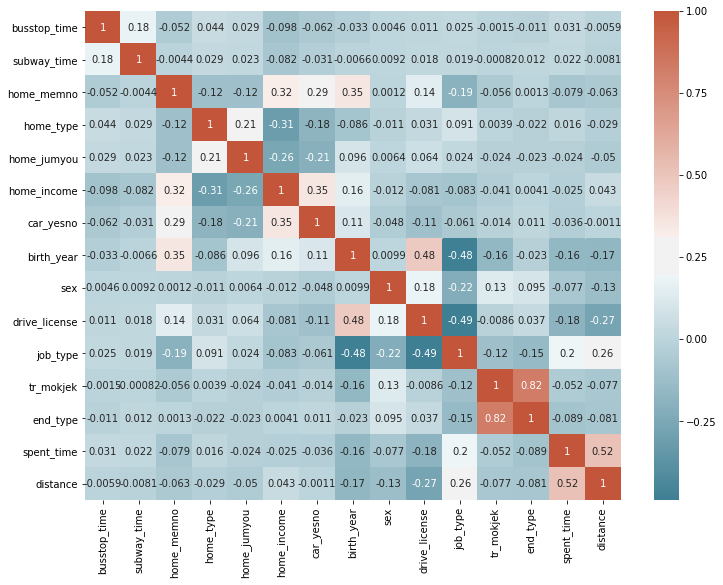

In [41]:
cmap = sns.diverging_palette(220, 20, sep = 20, as_cmap = True)
plt.figure(figsize = (12, 9))
sns.heatmap(htd_dep.corr(), annot = True, cmap = cmap)
plt.show()

In [43]:
features = 'busstop_time+subway_time+home_memno+home_type+home_jumyou+home_income+car_yesno+birth_year+sex+drive_license+job_type+tr_mokjek+end_type+spent_time+distance'

y, x = dmatrices('travel_mode ~' + features, htd_dep, return_type = 'dataframe')

In [44]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [45]:
vif

,VIF Factor,features
0,20506.483988,Intercept
1,1.042200,busstop_time
2,1.039152,subway_time
3,1.299275,home_memno
4,1.142926,home_type
5,1.151815,home_jumyou
6,1.379878,home_income
7,1.242539,car_yesno
8,1.812204,birth_year
9,1.094944,sex


## 8) 데이터 유형 변환

In [46]:
htd_final = htd_dep

htd_final['home_type'] = htd_final['home_type'].astype('category')
htd_final['home_jumyou'] = htd_final['home_jumyou'].astype('category')
htd_final['home_income'] = htd_final['home_income'].astype('category')
htd_final['car_yesno'] = htd_final['car_yesno'].astype('category')
htd_final['sex'] = htd_final['sex'].astype('category')
htd_final['drive_license'] = htd_final['drive_license'].astype('category')
htd_final['job_type'] = htd_final['job_type'].astype('category')
htd_final['tr_mokjek'] = htd_final['tr_mokjek'].astype('category')
htd_final['end_type'] = htd_final['end_type'].astype('category')
htd_final['travel_mode'] = htd_final['travel_mode'].astype('category')

htd_final = htd_final.drop(['rcode_x', 'rcode_y'], 1)

In [47]:
htd_final.to_csv('./htd_final.csv', index= None)

In [48]:
htd_final = pd.read_csv('./htd_final.csv', nrows= None)
htd_final.head()

,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,drive_license,job_type,tr_mokjek,end_type,spent_time,distance,travel_mode
0,7,15,1,4,1,1,2,1949,2,2,8,3,2,30,1748.215472,public
1,7,15,1,4,1,1,2,1949,2,2,8,2,1,30,1748.215472,public
2,6,10,4,4,2,1,1,1959,2,2,4,3,2,20,2803.832510,public
3,6,10,4,4,2,1,1,1959,2,2,4,2,1,90,2803.832510,public
4,6,10,4,4,2,1,1,1959,2,2,4,10,5,10,0.000000,walk


# 3. PCA for Data Visualization

In [62]:
htd_final.head()

,busstop_time,subway_time,home_memno,home_type,home_jumyou,home_income,car_yesno,birth_year,sex,drive_license,job_type,tr_mokjek,end_type,spent_time,distance,travel_mode
0,7,15,1,4,1,1,2,1949,2,2,8,3,2,30,1748.215472,public
1,7,15,1,4,1,1,2,1949,2,2,8,2,1,30,1748.215472,public
2,6,10,4,4,2,1,1,1959,2,2,4,3,2,20,2803.832510,public
3,6,10,4,4,2,1,1,1959,2,2,4,2,1,90,2803.832510,public
4,6,10,4,4,2,1,1,1959,2,2,4,10,5,10,0.000000,walk


In [63]:
htd_final.drop(['busstop_time','home_memno','home_type' ,'home_jumyou', 'birth_year'], axis = 1, inplace=True)

In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [65]:
# X, y copy
htd_onehot = htd_final.loc[:,htd_final.columns != 'travel_mode'].copy()
htd_onehot_target = htd_final.loc[:,htd_final.columns == 'travel_mode'].copy()
# del(htd_final)

In [66]:
# StanardScaler
htd_onehot_scale = StandardScaler().fit_transform(htd_onehot)
pd.DataFrame(htd_onehot_scale).head()

,0,1,2,3,4,5,6,7,8,9
0,0.536170,-2.024872,0.421137,0.998746,1.087306,1.745158,-0.294695,-0.266567,-0.021735,-0.473401
1,0.536170,-2.024872,0.421137,0.998746,1.087306,1.745158,-0.699151,-0.893369,-0.021735,-0.473401
2,-0.101431,-2.024872,-2.374523,0.998746,1.087306,0.192167,-0.294695,-0.266567,-0.389131,-0.254323
3,-0.101431,-2.024872,-2.374523,0.998746,1.087306,0.192167,-0.699151,-0.893369,2.182639,-0.254323
4,-0.101431,-2.024872,-2.374523,0.998746,1.087306,0.192167,2.536498,1.613839,-0.756526,-0.836219


### PCA Projection to 2D

In [67]:
# PCA projection 
pca = PCA(n_components=2) # define the dimension
principalComponents = pca.fit_transform(htd_onehot_scale)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,0.042147,-0.496510
1,0.439914,-1.097562
2,-0.722403,-0.933028
3,0.612538,-0.868512
4,-2.898188,1.568152


In [68]:
finalDf = pd.concat([principalDf, htd_onehot_target['travel_mode']], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,travel_mode
0,0.042147,-0.496510,public
1,0.439914,-1.097562,public
2,-0.722403,-0.933028,public
3,0.612538,-0.868512,public
4,-2.898188,1.568152,walk


In [69]:
pd.unique(finalDf['travel_mode'])
finalDf.travel_mode.value_counts()
# finalDf[finalDf['travel_mode'] == '']

[public, walk, private]
Categories (3, object): [public, walk, private]

public     220190
walk       191576
private    152322
Name: travel_mode, dtype: int64

### Visualize 2D projection

Use a PCA projection to 2d to visualize the entire data set.<br>
You should plot different classes using different colors or shapes.<br>
Do the classes seem well-separated from each other?

Text(0.5,0,'Principal Component 1')

Text(0,0.5,'Principal Component 2')

Text(0.5,1,'2 Component PCA')

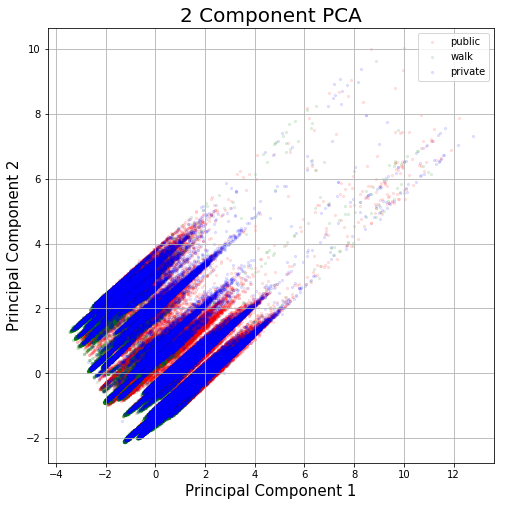

In [70]:
# 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['public', 'walk', 'private']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['travel_mode'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
               s = 5,
               alpha = 0.1
              )
ax.legend(targets)
ax.grid()

### 3D PCA VIS

In [71]:
# 3d
# PCA projection 
pca = PCA(n_components=3) # define the dimension
principalComponents = pca.fit_transform(htd_onehot_scale)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1',
                          'principal component 2',
                          'principal component 3'])
principalDf.head()

,principal component 1,principal component 2,principal component 3
0,0.042147,-0.496510,1.601661
1,0.439914,-1.097562,1.605299
2,-0.722403,-0.933028,3.133130
3,0.612538,-0.868512,3.458808
4,-2.898188,1.568152,3.091163


In [72]:
finalDf = pd.concat([principalDf, htd_onehot_target['travel_mode']], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,principal component 3,travel_mode
0,0.042147,-0.496510,1.601661,public
1,0.439914,-1.097562,1.605299,public
2,-0.722403,-0.933028,3.133130,public
3,0.612538,-0.868512,3.458808,public
4,-2.898188,1.568152,3.091163,walk


### Visualize 3D projection

Text(0.5,0,'Principal Component 1')

Text(0.5,0,'Principal Component 2')

Text(0.5,0,'Principal Component 3')

Text(0.5,0.92,'3 Component PCA')

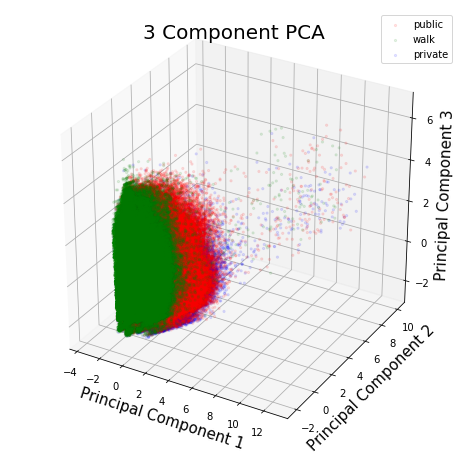

In [73]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection = '3d') 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 Component PCA', fontsize = 20)


targets = ['public', 'walk', 'private']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['travel_mode'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               finalDf.loc[indicesToKeep, 'principal component 3'],
               c = color,
               s = 5,
               alpha = 0.1
              )
ax.legend(targets)
ax.grid()

# 4. 모델 구축

## 1) without PCA

In [75]:
# X, y copy
htd_onehot = htd_final.loc[:,htd_final.columns != 'travel_mode'].copy()
htd_onehot_target = htd_final.loc[:,htd_final.columns == 'travel_mode'].copy()
# del(htd_final)

htd_onehot = htd_onehot.values
htd_onehot

array([[15, 1, 2, ..., 2, 30, 1748.21547165866],
       [15, 1, 2, ..., 1, 30, 1748.21547165866],
       [10, 1, 1, ..., 2, 20, 2803.83251040563],
       ...,
       [0, 2, 2, ..., 4, 15, 1443.686179758],
       [0, 2, 2, ..., 4, 120, 5728.64067077398],
       [0, 3, 2, ..., 5, 20, 1397.78433035082]], dtype=object)

In [76]:
htd_final.columns

Index(['subway_time', 'home_income', 'car_yesno', 'sex', 'drive_license',
       'job_type', 'tr_mokjek', 'end_type', 'spent_time', 'distance',
       'travel_mode'],
      dtype='object')

In [77]:
# category column 지정
label_column = [1,2,3,4,5,6,7] # Series 형태로 넣어줘야하므로 iloc 방식으로 특정 컬럼만 지정

# 1) label encoding
## onehot encoding은 숫자형태만 input으로 받기에 명목변수를 숫자화 해줌
from sklearn import preprocessing
for column_index in label_column:
    le = preprocessing.LabelEncoder()
    htd_onehot[:,column_index] = le.fit_transform(htd_onehot[:,column_index])
    del le

# 2) onehot encoding 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features = [label_column])
X_data = ohe.fit_transform(htd_onehot)

In [78]:
print(X_data.toarray())
X_data = X_data.toarray()

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.50000000e+01
  3.00000000e+01 1.74821547e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.50000000e+01
  3.00000000e+01 1.74821547e+03]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+01
  2.00000000e+01 2.80383251e+03]
 ...
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.50000000e+01 1.44368618e+03]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.20000000e+02 5.72864067e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  2.00000000e+01 1.39778433e+03]]


In [79]:
# Prepare the input features
# X
X_data.shape
# y
lb = preprocessing.LabelBinarizer()
Y = lb.fit_transform(htd_onehot_target.travel_mode)
Y.shape

(564088, 39)

(564088, 3)

In [94]:
# X_data = htd_onehot[features].values
# X_data.shape

In [80]:
# Split train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    Y,
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [81]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(394861, 39)

(394861, 3)

(169227, 39)

(169227, 3)

In [116]:
# save data as pickle
import pickle

with open('travel.p', 'wb') as file:  
    # train
    pickle.dump(X_train, file)
    pickle.dump(y_train, file)
    # test
    pickle.dump(X_test, file)
    pickle.dump(y_test, file)

# 5. model 재현하기

In [118]:
#load pickle data

with open('travel.p', 'rb') as file:
    X_train = pickle.load(file)
    y_train = pickle.load(file)
    X_test = pickle.load(file)
    y_test = pickle.load(file)

In [119]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(394861, 39)

(394861, 3)

(169227, 39)

(169227, 3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [85]:
# Tensorflow neural network
# Parameters
learning_rate = 0.3
training_epochs = 3
batch_size = 100

# Neural Network Parameters
n_hidden_1 = 128 # 1st layer number of neurons
n_hidden_2 = 256 # 1st layer number of neurons
n_hidden_3 = 256 # 3rd layer number of neurons
n_hidden_4 = 128 # 3rd layer number of neurons

n_input = X_train.shape[1] # input shape (105, 4)
n_classes = y_train.shape[1] # classes to predict

# Inputs
X = tf.placeholder("float", shape=[None, n_input])
y = tf.placeholder("float", shape=[None, n_classes])


# Dictionary of Weights and Biases
weights = {
    # He initialization
    'h1': tf.Variable(initial_value = tf.random_normal(shape=[n_input, n_hidden_1],
                                    stddev = 1/np.sqrt(n_input/2))),
    'h2': tf.Variable(tf.random_normal(shape=[n_hidden_1, n_hidden_2],
                                    stddev = 1/np.sqrt(n_hidden_1/2))),
    'h3': tf.Variable(tf.random_normal(shape=[n_hidden_2, n_hidden_3],
                                    stddev = 1/np.sqrt(n_hidden_2/2))),
    'h4': tf.Variable(tf.random_normal(shape=[n_hidden_3, n_hidden_4],
                                    stddev = 1/np.sqrt(n_hidden_3/2))),

#   'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])), 
#   'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
#   'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
#   'h4': tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.random_normal([n_hidden_4, n_classes]))
}

biases = {
  'b1': tf.Variable(tf.random_normal([n_hidden_1])),
  'b2': tf.Variable(tf.random_normal([n_hidden_2])),
  'b3': tf.Variable(tf.random_normal([n_hidden_3])),
  'b4': tf.Variable(tf.random_normal([n_hidden_4])),
  'out': tf.Variable(tf.random_normal([n_classes]))
}

In [86]:
# Forward propagation
# Model Forward Propagation step
def forward_propagation(x):
    # Hidden layer1
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output fully connected layer
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out'] 
    return out_layer


# Model Outputs
yhat = forward_propagation(X)
ypredict = tf.argmax(yhat, axis = 1)

In [87]:
# Backward propagation
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, 
                                                              logits = yhat)) # soft-max
# cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, 
#                                                               logits = yhat)) # sigmoid
# optimizer = tf.train.GradientDescentOptimizer(learning_rate)
optimizer = tf.train.AdamOptimizer(learning_rate)

train_op = optimizer.minimize(cost)

In [99]:
# # Train model
# # Initializing the variables

# save_file = './model_save/model.ckpt'

# init = tf.global_variables_initializer()
# saver = tf.train.Saver()

# with tf.Session() as sess:
#     sess.run(init)
    

#     # EPOCHS
#     for epoch in range(training_epochs):
# #         for i in range(len(X_train)): # Stochasting Gradient Descent
#         batch_count = int(X_train.shape[0]/100)
#         for i in range(batch_count):  # mini batch 
#             # 배치사이즈 만큼 데이터를 읽어옴
#             batch_xs, batch_ys = X_train[i*batch_size:i*batch_size+batch_size], y_train[i*batch_size:i*batch_size+batch_size] 
#             summary = sess.run(train_op, feed_dict = {X: batch_xs,
#                                                       y: batch_ys})
        
#         train_accuracy = np.mean(np.argmax(y_train, axis = 1) == sess.run(ypredict, 
#                                                                         feed_dict = {X: X_train, y: y_train}))
#         test_accuracy  = np.mean(np.argmax(y_test, axis = 1) == sess.run(ypredict, 
#                                                                        feed_dict = {X: X_test, y: y_test}))
                
#         print("Epoch = %d, train accuracy = %.2f%%, test accuracy = %.2f%%" % (epoch + 1, 100. * train_accuracy, 100. * test_accuracy))
#         predictions = ypredict.eval(feed_dict = {X : X_test})
        
#         # Save the model
#         saver.save(sess, save_file)

#     sess.close()

Epoch = 1, train accuracy = 39.01%, test accuracy = 39.09%


'./model.ckpt'

Epoch = 2, train accuracy = 39.01%, test accuracy = 39.09%


'./model.ckpt'

Epoch = 3, train accuracy = 39.01%, test accuracy = 39.09%


'./model.ckpt'

## Model 실행하기

In [111]:
save_file = './model_save/model.ckpt'
saver = tf.train.Saver()

# Launch the graph
with tf.Session() as sess:
    saver.restore(sess, save_file)
 
    test_accuracy = sess.run(
        ypredict,
        feed_dict = {X: X_test, y: y_test})
 
print('Test Accuracy: {}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./model_save/model.ckpt
Test Accuracy: [1 1 1 ... 1 1 1]


## [ 39.09%]
### Parameters
- learning_rate = 0.01
- training_epochs = 10
- batch_size = 100

### Neural Network Parameters
- n_hidden_1 = 256 # 1st layer number of neurons
- n_hidden_2 = 128 # 1st layer number of neurons
- n_hidden_3 = 64 # 3rd layer number of neurons

### Adam, minibatch, softmax